<a href="https://colab.research.google.com/github/MatthewALanham/analyticscamp/blob/main/window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and Inspecting the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the dataset
df = pd.read_excel('window_breakage_data.xlsx')

# 2)Inspect columns and first few rows to understand which fields we have available:
print("Columns in the dataset:")
print(df.columns.tolist())
print("\nFirst five rows:")
display(df.head())


Columns in the dataset:
['PF Rowstate', 'Batch', 'Breakage Rate', 'Yield', 'YldFrctn', 'YieldX', 'Pass/Fail', 'Window Size', 'Glass thickness', 'Ambient Temp', 'Cut speed', 'Edge Deletion rate', 'Spacer Distance', 'Window color', 'Window Type', 'Glass Supplier', 'Silicon Viscosity', 'Glass Supplier Location']

First five rows:


,PF Rowstate,Batch,Breakage Rate,Yield,YldFrctn,YieldX,Pass/Fail,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Window Type,Glass Supplier,Silicon Viscosity,Glass Supplier Location
0,1024.0,4011,6.207,93.793358,0.937934,1.216623,Pass,69.410127,0.5076,19.421091,1.520784,15.515228,3.299172,79.90,Vinyl,Supplier A,8.942454,Minnesota
1,1024.0,4015,2.884,97.110487,0.971105,1.329818,Pass,62.054341,0.5015,11.809967,2.606436,14.571468,5.597298,83.21,Vinyl,Supplier C,8.409810,Iowa
2,1024.0,4016,4.586,95.413742,0.954137,1.266765,Pass,56.379612,0.5091,23.466869,1.140074,15.409698,4.831903,92.09,Aluminum,Supplier D,10.338810,Wisconsin
3,1024.0,4017,1.823,98.120298,0.981203,1.376600,Pass,62.776805,0.5061,18.177280,1.868036,15.728905,4.719640,78.57,Wood,Supplier C,15.181158,Iowa
4,1024.0,4018,0.601,99.228920,0.992289,1.446533,Pass,NaN,0.5092,23.517670,0.614988,15.408881,5.638548,70.29,Vinyl,NaN,13.333607,NaN


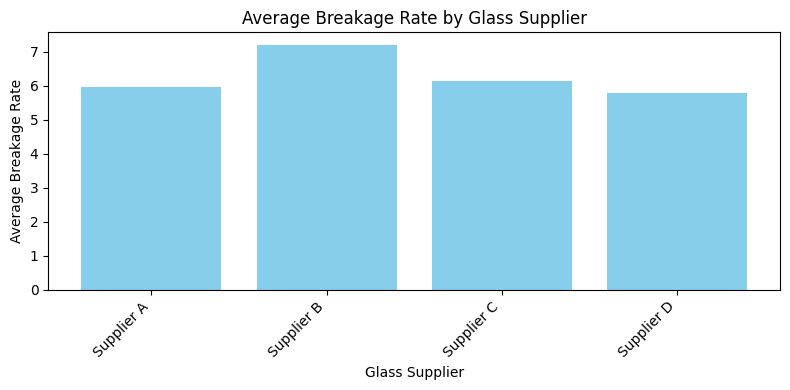

In [ ]:
# -----------------------------------------------------------------------------------
#  1) Simple Bar Chart: Average Breakage Rate by Glass Supplier
#     --------------------------------------------------
avg_breakage = df.groupby('Glass Supplier')['Breakage Rate'].mean()

plt.figure(figsize=(8, 4))
plt.bar(avg_breakage.index, avg_breakage.values, color='skyblue')
plt.title('Average Breakage Rate by Glass Supplier')
plt.xlabel('Glass Supplier')
plt.ylabel('Average Breakage Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

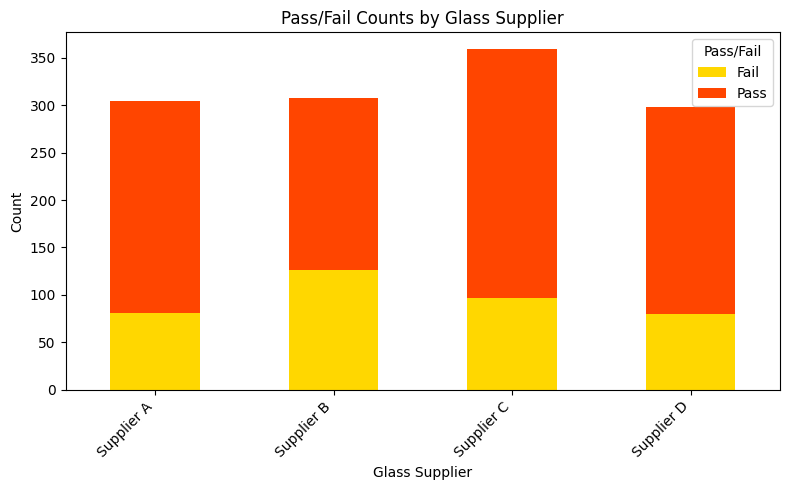

In [ ]:
# -----------------------------------------------------------------------------------
#  2) Stacked Bar Chart: Counts of Pass/Fail by Glass Supplier
#     --------------------------------------------------
counts = df.groupby(['Glass Supplier', 'Pass/Fail']).size().unstack(fill_value=0)

counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['gold', 'orangered']  # you can choose any two contrasting colors
)
plt.title('Pass/Fail Counts by Glass Supplier')
plt.xlabel('Glass Supplier')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pass/Fail')
plt.tight_layout()
plt.show()



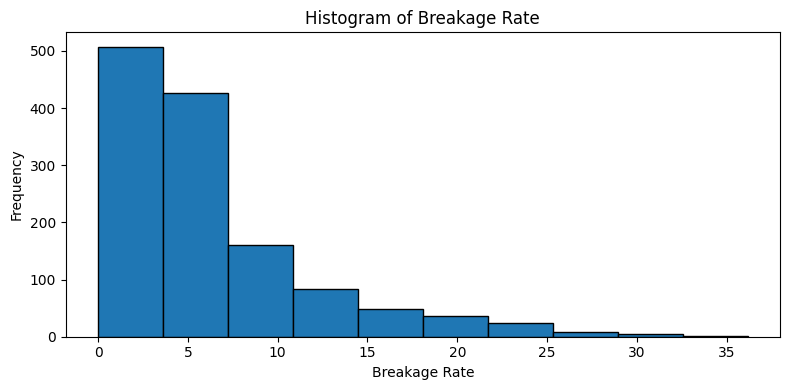

In [ ]:
# -----------------------------------------------------------------------------------
#  8) Histogram: Distribution of Breakage Rate
#     --------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(df['Breakage Rate'].dropna(), edgecolor='black')
plt.title('Histogram of Breakage Rate')
plt.xlabel('Breakage Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

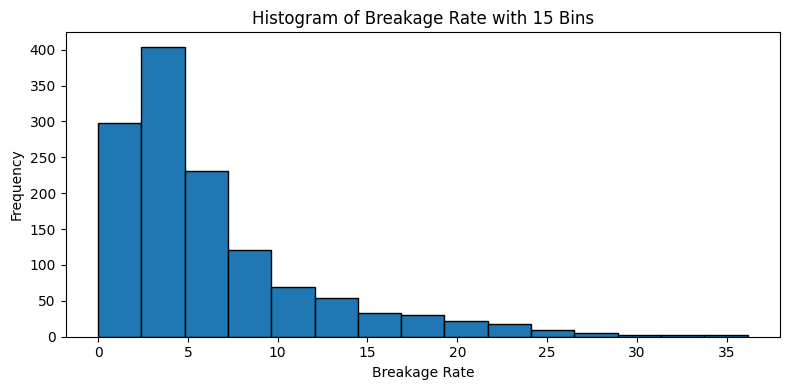

In [ ]:
# -----------------------------------------------------------------------------------
#  9) Histogram with Customized Bins (e.g., 15 bins)
#     --------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(df['Breakage Rate'].dropna(), bins=15, edgecolor='black')
plt.title('Histogram of Breakage Rate with 15 Bins')
plt.xlabel('Breakage Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

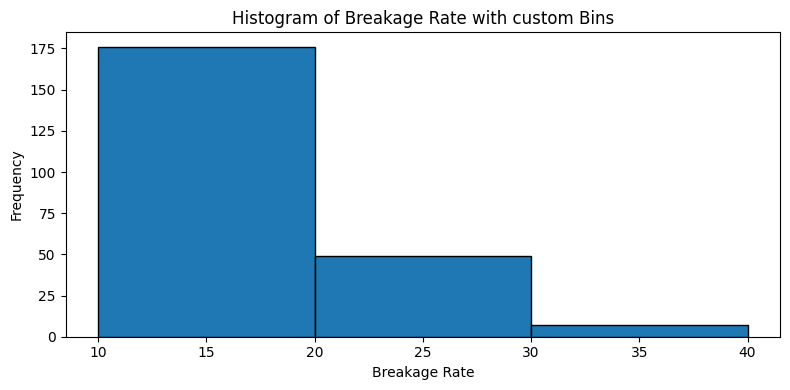

In [ ]:
# -----------------------------------------------------------------------------------
#  9) Histogram with Customized Bin Boundaries
#     --------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(df['Breakage Rate'].dropna(), bins=[10,20,30,40], edgecolor='black')
plt.title('Histogram of Breakage Rate with custom Bins')
plt.xlabel('Breakage Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

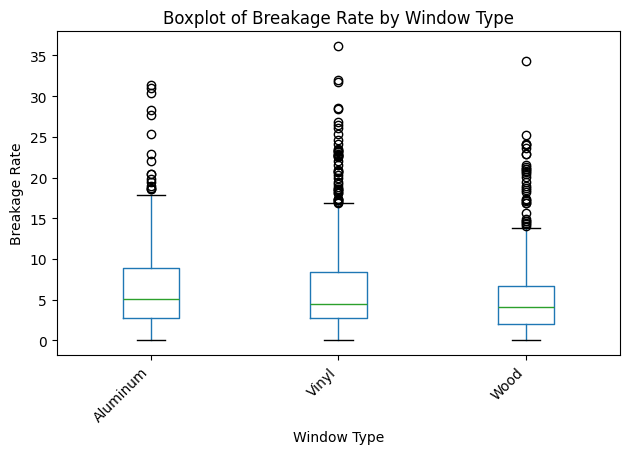

In [ ]:
# -----------------------------------------------------------------------------------
#  10) Boxplots: Breakage Rate by Window Type
#      --------------------------------------------------
plt.figure(figsize=(8, 5))
df.boxplot(column='Breakage Rate', by='Window Type', grid=False)
plt.title('Boxplot of Breakage Rate by Window Type')
plt.suptitle('')  # Remove the default “Boxplot grouped by …” super‐title
plt.xlabel('Window Type')
plt.ylabel('Breakage Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

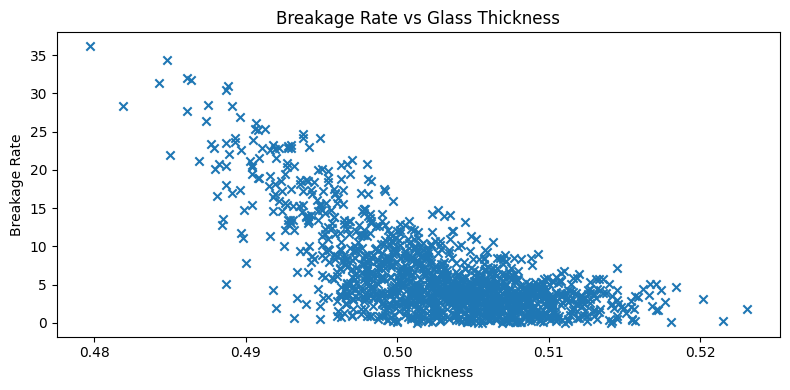

In [ ]:
# -----------------------------------------------------------------------------------
#  11) Scatterplots
#      --------------------------------------------------
# Filter out any rows with missing Glass thickness or Breakage Rate or Pass/Fail
scatter_df = df.dropna(subset=['Glass thickness', 'Breakage Rate', 'Pass/Fail'])

#  11a) Simple Scatter: Breakage Rate vs. Glass thickness
plt.figure(figsize=(8, 4))
plt.scatter(scatter_df['Glass thickness'], scatter_df['Breakage Rate'], marker='x')
plt.title('Breakage Rate vs Glass Thickness')
plt.xlabel('Glass Thickness')
plt.ylabel('Breakage Rate')
plt.tight_layout()
plt.show()

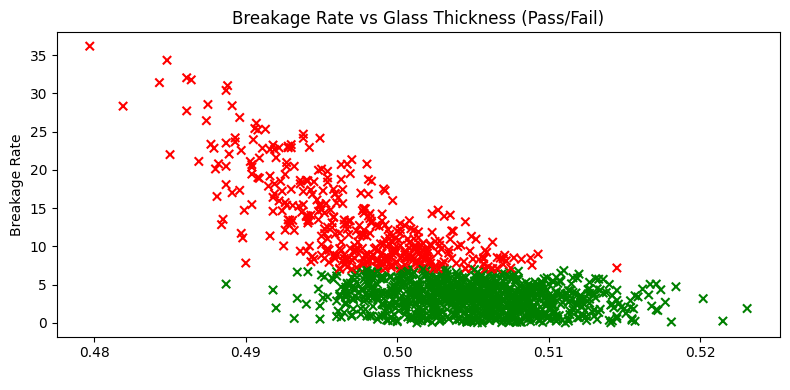

In [ ]:
#  11b) Colour-Differentiated Scatter by Pass/Fail (e.g., Pass=green, Fail=red)
color_map = scatter_df['Pass/Fail'].map({'Pass': 'green', 'Fail': 'red'})

plt.figure(figsize=(8, 4))
plt.scatter(
    scatter_df['Glass thickness'],
    scatter_df['Breakage Rate'],
    c=color_map,
    marker='x'
)
plt.title('Breakage Rate vs Glass Thickness (Pass/Fail)')
plt.xlabel('Glass Thickness')
plt.ylabel('Breakage Rate')
plt.tight_layout()
plt.show()


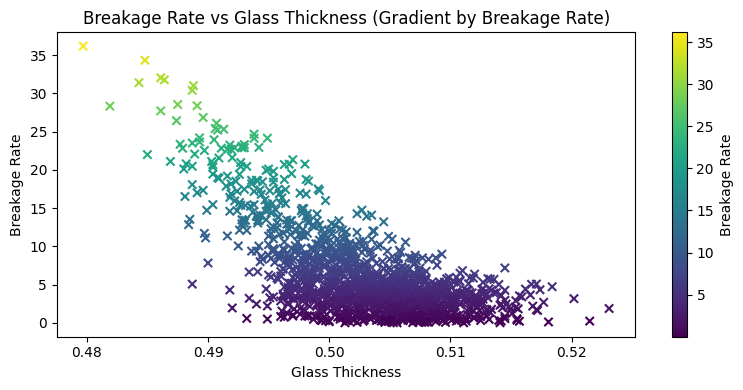

In [ ]:
#  11c) Gradient Variation: Colour Each Point by Its Breakage Rate
plt.figure(figsize=(8, 4))
sc = plt.scatter(
    scatter_df['Glass thickness'],
    scatter_df['Breakage Rate'],
    c=scatter_df['Breakage Rate'],
    cmap='viridis',
    marker='x'
)
plt.title('Breakage Rate vs Glass Thickness (Gradient by Breakage Rate)')
plt.xlabel('Glass Thickness')
plt.ylabel('Breakage Rate')
plt.colorbar(sc, label='Breakage Rate')
plt.tight_layout()
plt.show()